<a href="https://colab.research.google.com/github/Smarth2005/UCS420-Cognitive-Computing-Lab-Assignments/blob/main/Python%20Basic%20Libraries%3A%20Hands-On%20Implementation/L4.Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seaborn Unlocked: Turning Data into Stunning Visuals! 🚀📊

#### 1. Univariate Distribution Plots (Single Variable)
- Histogram
- KDE Plot
- ECDF Plot
- Rug Plot

#### 2. Bivariate Distribution Plots (Two Variables)
- Joint Plot
- Hexbin Plot

#### 3. Categorical Distribution Plots (Comparing Categories)
- Box Plot
- Violin Plot
- Swarm Plot
- Strip Plot

#### 4. Multivariate Distribution Plots (Multiple Variables)
- Pair Plot
- Heatmap (Correlation Matrix)

#### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the dataset

In [ ]:
df = pd.read_csv('tips.csv')

# df = sns.load_dataset("tips") # Also works

#### Show the top 5 records

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Check the datatypes

In [ ]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [ ]:
# Check Null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   Gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


#### Check the number of unique values of each column

In [ ]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

#### Check statistics of the dataset

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Exploring data

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['total_bill', 'tip', 'size']

We have 4 categorical features : ['sex', 'smoker', 'day', 'time']


In [ ]:
print("Categories in 'sex' variable   : ",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable: ",end=" ")
print(df['smoker'].unique())

print("Categories in 'day' variable   : ",end=" " )
print(df['day'].unique())

print("Categories in 'time' variable  : ",end=" " )
print(df['time'].unique())

Categories in 'sex' variable   :  ['Female' 'Male']
Categories in 'smoker' variable:  ['No' 'Yes']
Categories in 'day' variable   :  ['Sun' 'Sat' 'Thur' 'Fri']
Categories in 'time' variable  :  ['Dinner' 'Lunch']


In [ ]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


#### Exploring data (Visualization)

### **Core concepts of Correlation** (from Probability & Statistics).

###  What is Correlation?
Correlation measures how **two variables move together**. It tells us:  
✅ **Direction** (positive or negative relationship)  
✅ **Strength** (strong, weak, or no correlation)  

#### Example:
- **Higher temperatures → Higher ice cream sales** (Positive Correlation ✅)
- **Higher temperature → Less coffee sales** (Negative Correlation ❌)
- **Shoe size & Intelligence?** (No correlation 🤷)

---

###  Pearson’s Correlation Coefficient (Most Common)
#### **Formula:**
$$
r = \frac{{\sum (X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum (X_i - \bar{X})^2} \cdot \sqrt{\sum (Y_i - \bar{Y})^2}}
$$

Where:  
- $X, Y$ are the two variables.  
- $\bar{X}, \bar{Y}$ are their mean values.
- $r$ is the **correlation coefficient**, always between **-1 to 1**.

#### **How to Interpret \( r \)?**
#### **Correlation Coefficient Interpretation**  

| <span style="font-size:16px;">**Correlation Coefficient ($r$)**</span> | <span style="font-size:18px;">**Meaning**</span> |
|----------------|--------------------------------|
| <span style="font-size:14px;">$ r = 1 $</span> | <span style="font-size:14px;">Perfect positive correlation </span> |
| <span style="font-size:14px;">$ r = -1 $</span> | <span style="font-size:14px;">Perfect negative correlation </span> |
| <span style="font-size:14px;">$ r = 0 $</span> | <span style="font-size:14px;">No correlation </span> |
| <span style="font-size:14px;">$ 0.7 \leq r < 1 $</span> | <span style="font-size:14px;">Strong positive correlation </span> |
| <span style="font-size:14px;">$ -1 < r \leq -0.7 $</span> | <span style="font-size:14px;">Strong negative correlation </span> |
| <span style="font-size:14px;">$ 0.3 \leq r < 0.7 $</span> | <span style="font-size:14px;">Moderate positive correlation </span> |
| <span style="font-size:14px;">$ -0.7 < r \leq -0.3 $</span> | <span style="font-size:14px;">Moderate negative correlation </span> |
| <span style="font-size:14px;">$ -0.3 < r < 0.3 $</span> | <span style="font-size:14px;">Weak correlation </span> |

---

###  How is Correlation Related to Covariance?
#### **Covariance formula:**
$$
\text{Cov}(X, Y) = \frac{1}{n} \sum (X_i - \bar{X}) (Y_i - \bar{Y})
$$

✅ **Covariance tells us the direction of the relationship but not the strength.**  
✅ **Pearson correlation = Normalized covariance** (bounded between -1 and 1):  
$$
r(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
$$

#### **Covariance Example:**
If **height & weight have positive covariance**, taller people generally weigh more.  
But if you change height from cm to inches, the covariance value will also change!  
That’s why **correlation is better**—it is **unit-free and always between -1 and 1**.

---


###  When to Use Correlation in Data Science?
✅ **Feature Selection** – Remove highly correlated variables to avoid redundancy.  
✅ **Checking Data Relationships** – Understand dependencies between variables.  
✅ **Detecting Multicollinearity** – Avoid using highly correlated predictors in regression models.  

---
### Correlation with Heatmaps
A **heatmap** is a visual representation of the correlation matrix, where different correlation values are represented using color intensity. It helps in understanding which features are strongly or weakly correlated.

### **Why Use a Heatmap?**
✅ Identifies **highly correlated features** that may cause redundancy in ML models.
✅ Helps in **feature selection** by highlighting important relationships.
✅ Provides an intuitive way to **visualize data dependencies**.

### **Seaborn Heatmap Implementation**
```python


In [ ]:
df.corr()

ValueError: could not convert string to float: 'Female'

In [ ]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
corr_matrix = df_numeric.corr()
print(corr_matrix)


            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<Axes: >

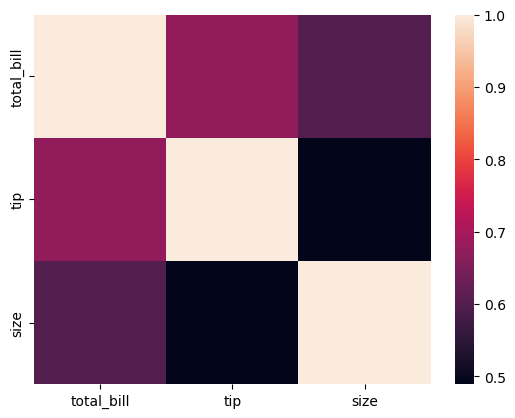

In [ ]:
sns.heatmap(corr_matrix)

### **Joint Plot**
A joint plot allows to study the relationship between 2 numeric variables. The central chart displays their correlation. It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot.

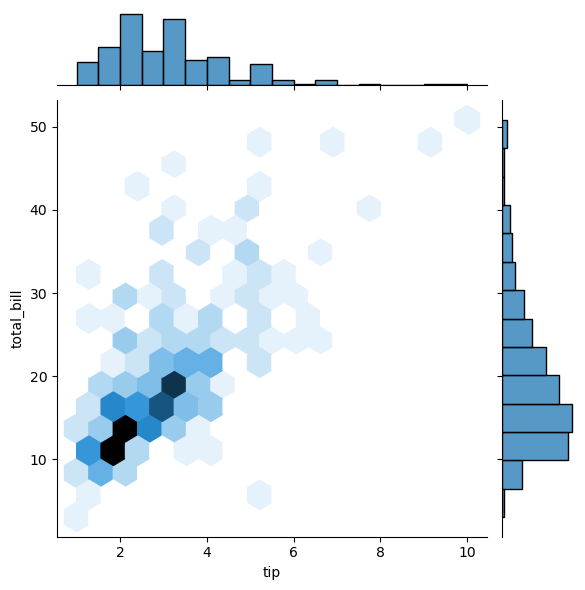

In [ ]:
sns.jointplot(x = 'tip', y = 'total_bill', data = df, kind = 'hex')

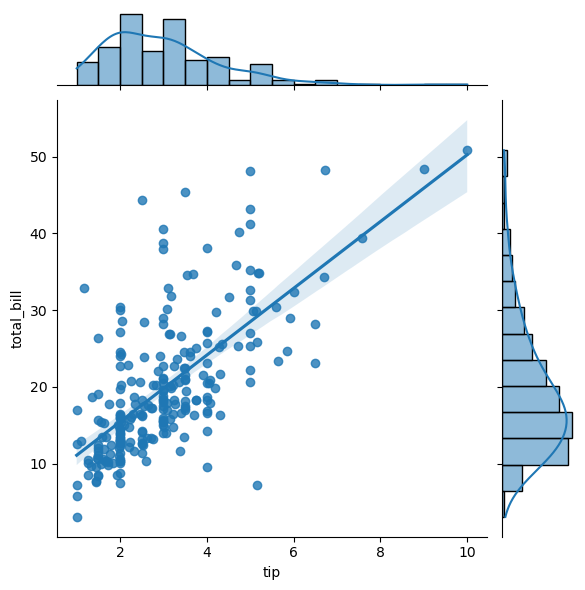

In [ ]:
sns.jointplot(x = 'tip', y = 'total_bill', data = df, kind = 'reg')

### **Pair Plot**

A "pair plot" is also known as a scatter plot, in which one variable in the same data row is matched with another variable's value, like this: Plair Plots are just elaborations on this, showing all variables paired with all the other variables.

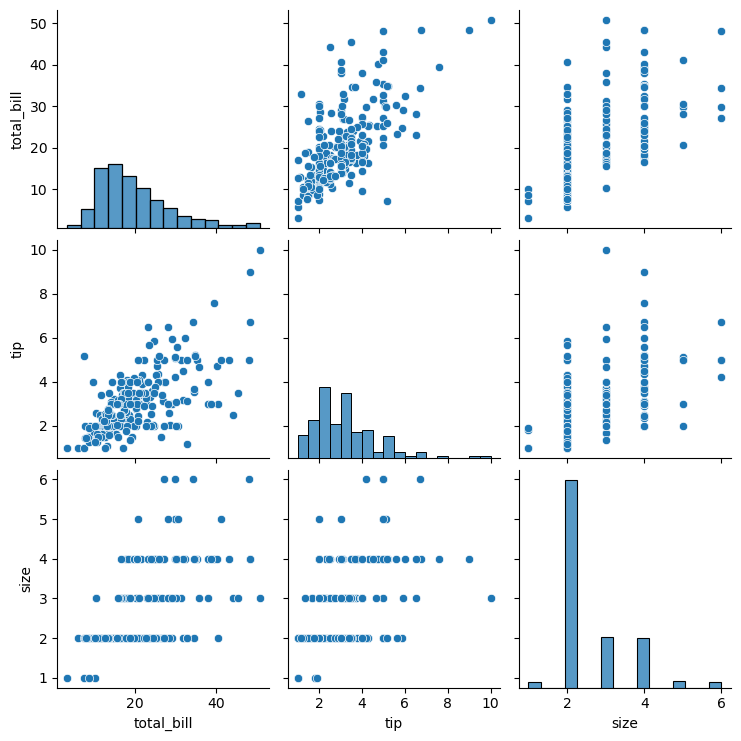

In [ ]:
sns.pairplot(df)

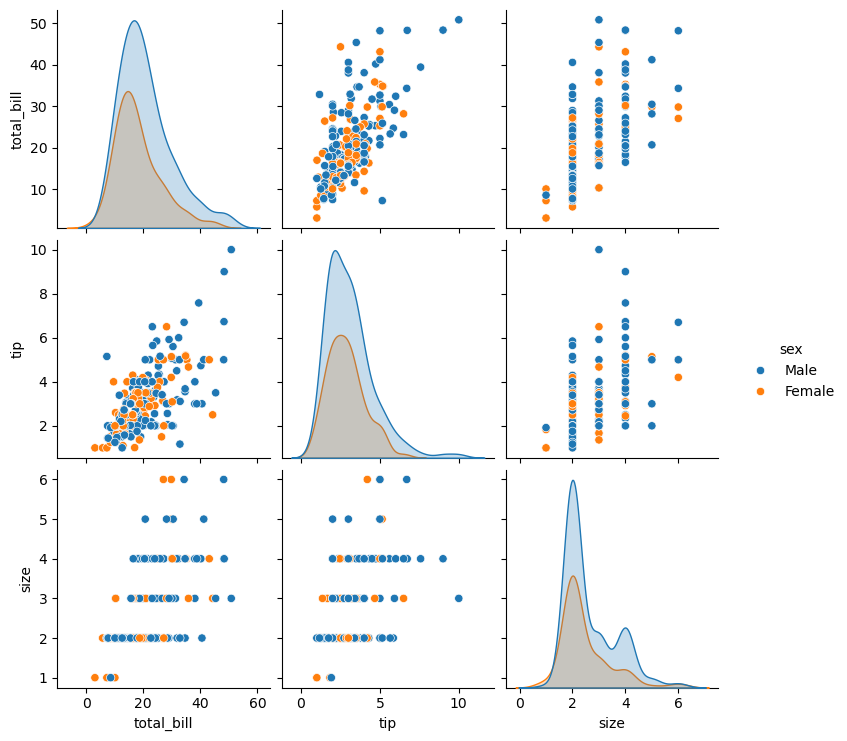

In [ ]:
sns.pairplot(df, hue = 'sex')

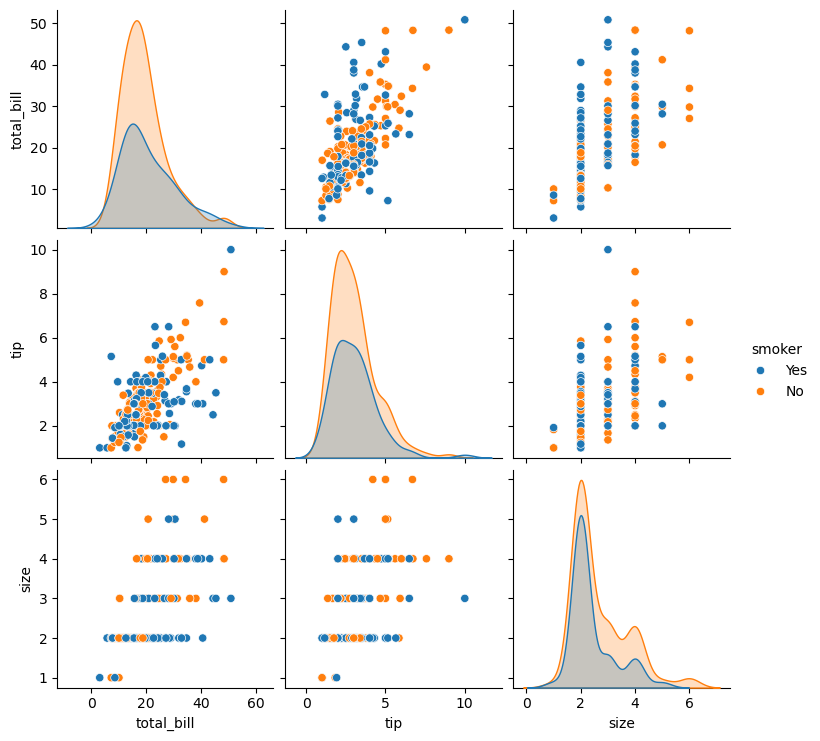

In [ ]:
sns.pairplot(df,hue = 'smoker')

In [ ]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

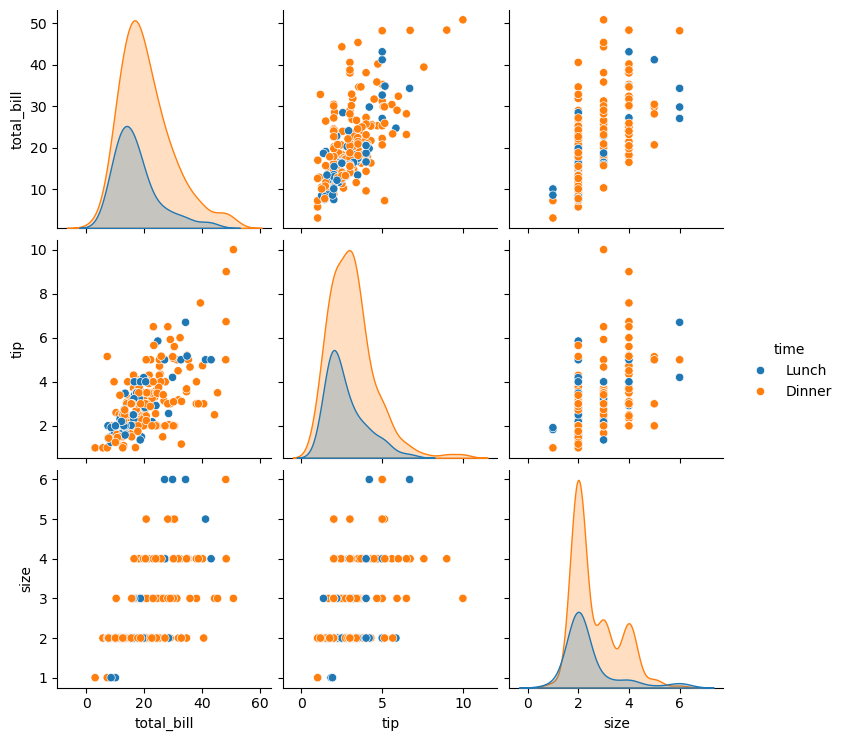

In [ ]:
sns.pairplot(df, hue = 'time')

### <span style="color:blue; font-weight:bold;"> Univariate Distribution Plots: </span>

### **Dist Plot**

Dist plot helps us to check the distribution of the columns feature.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7960\4235560333.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'])


<Axes: xlabel='tip', ylabel='Density'>

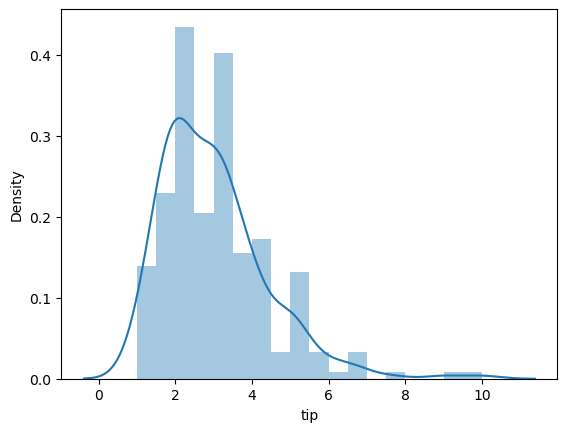

In [ ]:
sns.distplot(df['tip'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7960\3400313261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'], kde = False, bins = 10)


<Axes: xlabel='tip'>

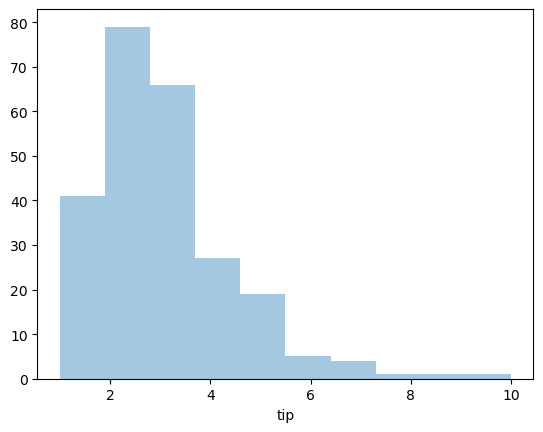

In [ ]:
sns.distplot(df['tip'], kde = False, bins = 10)

### <span style="color:blue; font-weight:bold;">Categorical Plots: </span>
### <span style="color:blue; font-weight:bold;">Count Plot: </span>

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12884\3879998663.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sex', data = df, palette = 'coolwarm')


<Axes: xlabel='sex', ylabel='count'>

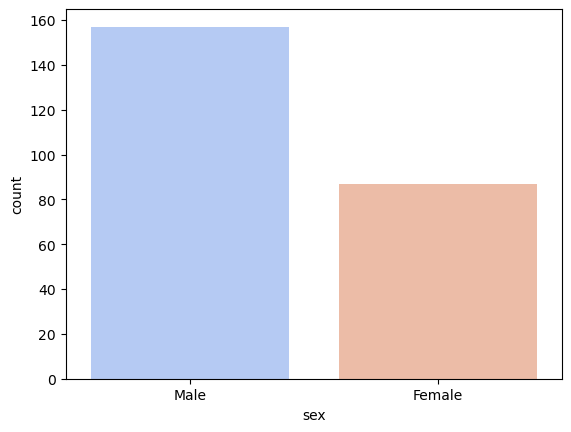

In [ ]:
sns.countplot(x = 'sex', data = df, palette = 'coolwarm')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12884\843105485.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'smoker', data = df, palette = 'viridis')


Text(0.5, 1.0, 'Count of Smokers vs Non-Smokers')

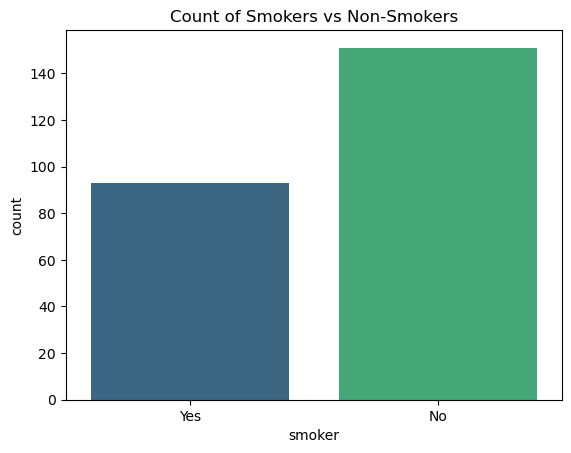

In [ ]:
sns.countplot(x = 'smoker', data = df, palette = 'viridis')
plt.title('Count of Smokers vs Non-Smokers')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12884\2583192945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'day', data = df, palette = 'pastel')


Text(0.5, 1.0, 'Count of Customers by day')

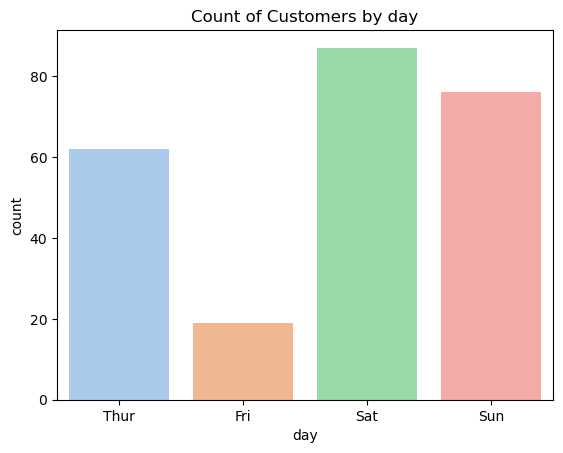

In [ ]:
sns.countplot(x = 'day', data = df, palette = 'pastel')
plt.title('Count of Customers by day')

<Axes: xlabel='count', ylabel='sex'>

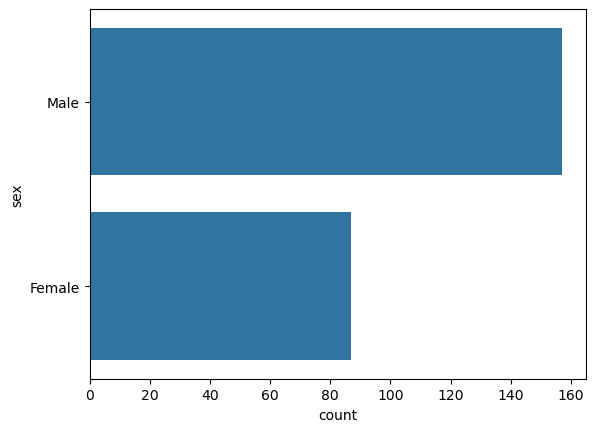

In [ ]:
sns.countplot(y = 'sex', data = df)

### **Bar Plot**

<Axes: xlabel='total_bill', ylabel='sex'>

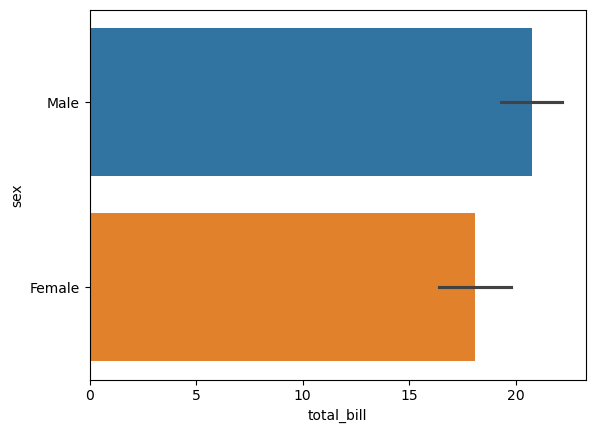

In [ ]:
sns.barplot(x = 'total_bill', y = 'sex', hue =  'sex', data = df, )

<Axes: xlabel='smoker', ylabel='total_bill'>

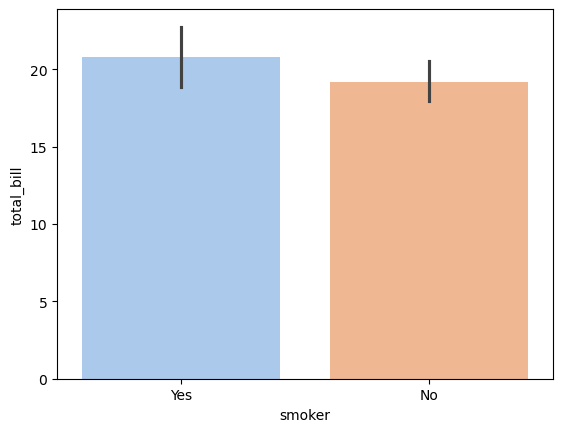

In [ ]:
sns.barplot(y = 'total_bill', x = 'smoker', hue = 'smoker', data = df, palette = 'pastel')

### **Box Plot**

A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary.

<Axes: xlabel='smoker', ylabel='total_bill'>

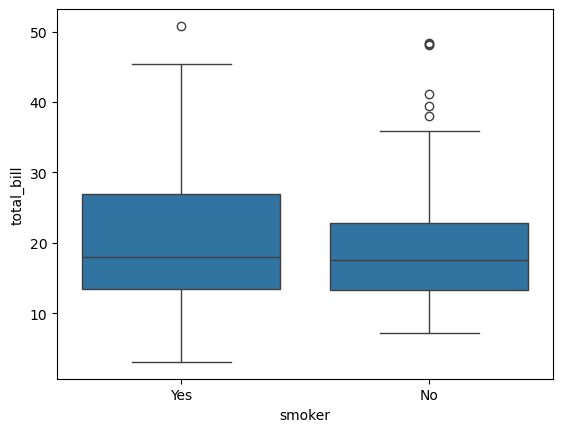

In [ ]:
sns.boxplot(x = 'smoker',y = 'total_bill',data = df)

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='day', ylabel='total_bill'>

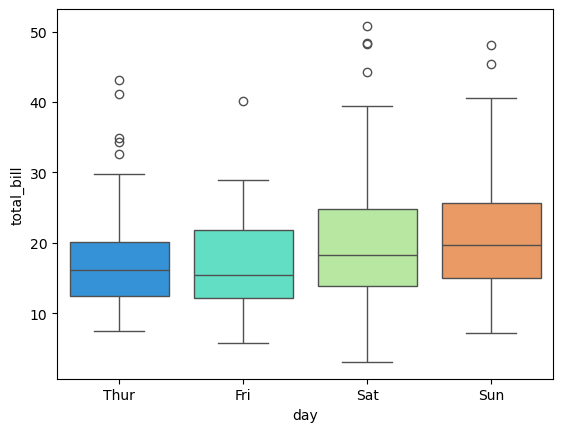

In [ ]:
sns.boxplot(x = 'day', y = 'total_bill', hue = 'day', data = df, palette = 'rainbow')

<Axes: >

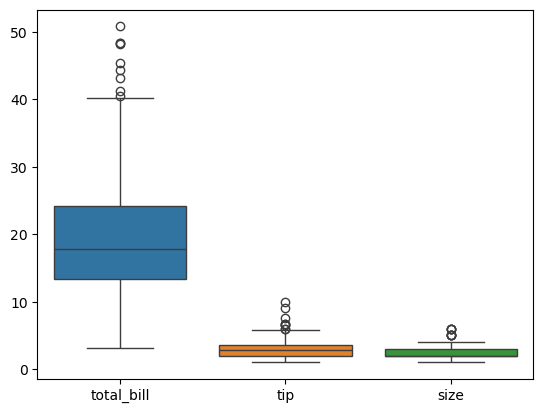

In [ ]:
sns.boxplot(data = df, orient = 'v')

<Axes: xlabel='total_bill', ylabel='day'>

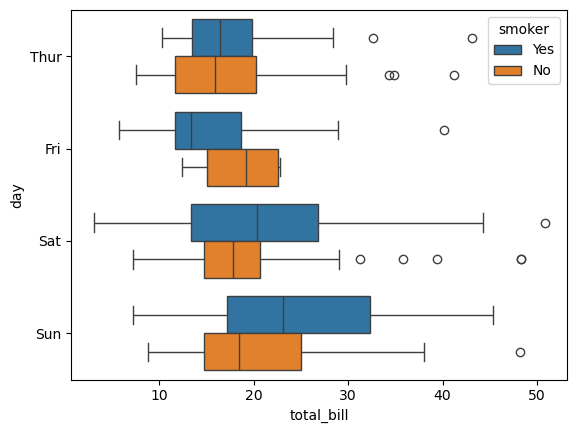

In [ ]:
# categorize my data based on some other categories
sns.boxplot(x = 'total_bill', y = 'day', hue = 'smoker', data = df)

### **Violin Plot**

Violin plot helps us to see both the distribution of data in terms of Kernel density estimation and the boxplot.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10308\512496289.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'total_bill', y = 'day', data = df, palette = 'rainbow')


<Axes: xlabel='total_bill', ylabel='day'>

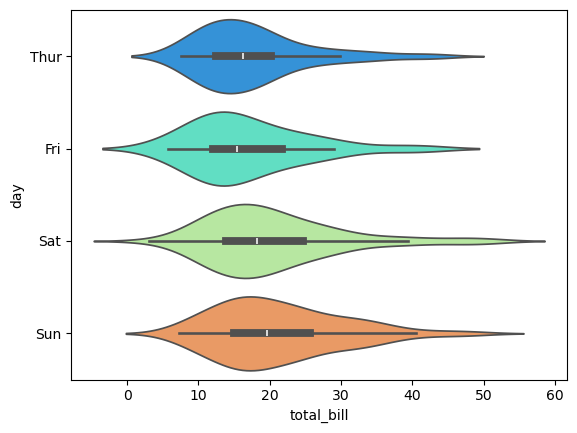

In [ ]:
sns.violinplot(x = 'total_bill', y = 'day', data = df, palette = 'rainbow')